In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def density_water(T):
    '''Density (rho) of water in kg/m^3 based on fluid temperature (T) nearest the flow meter in degrees Celsius'''
    rho = (999.85+5.332*(10**-2)*T-7.564*(10**-3)*(T**2)+4.323*(10**-5)*(T**3)-1.673*(10**-7)*(T**4)+2.447*(10**-10)*(T**5))
    return(rho)

def specific_heat_water(T):
    '''Specific heat (cp) of water in J/(kg K) based on mean fluid temperature (T) in degrees Celsius'''
    cp = (4.2184-2.8218*(10**-3)*T+7.3478*(10**-5)*(T**2)-9.4712*(10**-7)*(T**3)+7.2869*(10**-9)*(T**4)-2.8098*(10**-11)*(T**5)
          +4.4008*(10**-14)*(T**6))*1000
    return(cp)

def energy_momentum(Tk, Vk, zk):
    ''' Computes the energy momentum at a given layer of the water column '''
    return zk * Vk * density_water(Tk) * specific_heat_water(Tk)

def volume_per_layer(layer_height = 1):
    ''' Computes the volume of water in each layer of the water column '''
    a = 90.4 # side length of top surface
    # water layer height
    volume_per_layer = []
    for _ in range(1,int(16//layer_height+1)):
        b = a - 4*layer_height # the slope is 1:2 thus giving 1 m length at each side
        layer_volume = layer_height / 3 *(a**2 + a*b + b**2)
        volume_per_layer.append(layer_volume)
        a = b
    return pd.Series(volume_per_layer).round(0)[::-1].reset_index(drop=True).values

def stratification_number(T, H = 15):
    ''' Computes the stratification number for a given water column temperature profile '''
    dt_mean = (T[1:] - T[:-1]).mean()
    dt_max = (T.max() - T.min()) / 16
    return dt_mean / dt_max




def getP(i, df):
    return df.iloc[i,1:].values
def getT(i, df):
    return df.iloc[i,2:18].values

sim = pd.read_csv('../sim.csv')
pred = pd.read_csv('../p3.csv')
predw = pd.read_csv('../p3w.csv')
sd = pd.read_csv('../p3s.csv')
data = pd.read_csv('../data.csv')

V = volume_per_layer()
Z = np.linspace(0.5, 15, 16)
P = getP(0, sim)


StP = []
StD = []
for i in range(0, 1000):
    T = getT(i, data)
    P = getP(i, pred)
    StD.append(stratification_number(T))
    StP.append(stratification_number(P))







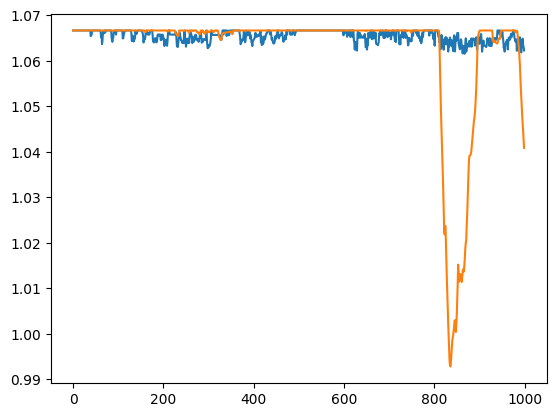

In [3]:
plt.plot(StD, label='Data')
plt.plot(StP, label='Prediction')

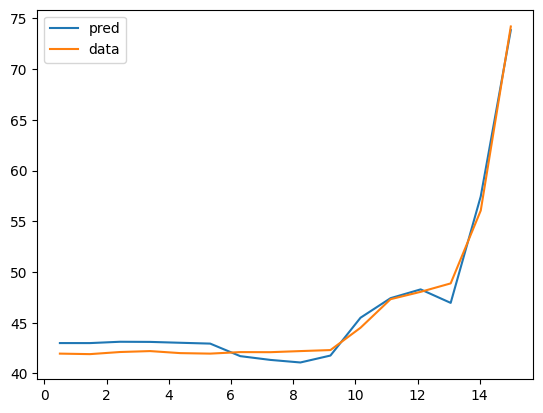

In [4]:
i = 850
s = getP(i, sim)
p = getP(i, pred)
d = getT(i, data)

# plt.plot(Z, s, label='sim')
plt.plot(Z, p, label='pred')
plt.plot(Z, d, label='data')
plt.legend()



In [5]:
# data.set_index('X', inplace=True)
data.iloc[:1000, 2:18]

X0         X1         X2         X3         X4         X5  \
0    15.100000  15.450000  15.800000  15.850000  15.700000  15.800000   
1    14.950000  15.433333  15.800000  15.850000  15.700000  15.800000   
2    14.766667  15.408333  15.800000  15.850000  15.700000  15.783333   
3    14.633333  15.425000  15.800000  15.850000  15.716667  15.750000   
4    14.533333  15.383333  15.800000  15.850000  15.800000  15.750000   
..         ...        ...        ...        ...        ...        ...   
995  42.516667  42.450000  42.741667  42.766667  42.600000  42.591667   
996  42.533333  42.475000  42.783333  42.800000  42.633333  42.583333   
997  42.650000  42.541667  42.808333  42.791667  42.633333  42.600000   
998  42.666667  42.550000  42.850000  42.850000  42.700000  42.600000   
999  42.700000  42.558333  42.850000  42.850000  42.700000  42.600000   

            X6         X7         X8         X9        X10        X11  \
0    16.000000  16.041667  16.200000  16.333333  20.450000  22.725000   
1    16.000000  16.050000  16.200000  16.400000  20.358333  22.708333   
2    16.016667  16.050000  16.191667  16.383333  20.350000  22.708333   
3    16.041667  16.050000  16.150000  16.350000  20.341667  22.700000   
4    16.033333  16.050000  16.150000  16.366667  20.250000  22.700000   
..         ...        ...        ...        ...        ...        ...   
995  42.700000  42.666667  42.850000  43.300000  47.466667  48.033333   
996  42.716667  42.683333  42.850000  43.150000  47.450000  48.033333   
997  42.716667  42.708333  42.850000  43.150000  47.408333  48.000000   
998  42.750000  42.700000  42.850000  43.100000  47.383333  48.025000   
999  42.783333  42.700000  42.925000  43.116667  47.366667  48.025000   

           X12        X13        X14        X15  
0    23.591667  32.316667  55.558333  66.750000  
1    23.600000  32.333333  55.508333  66.733333  
2    23.600000  32.333333  55.441667  66.675000  
3    23.633333  32.283333  55.375000  66.700000  
4    23.658333  32.266667  55.308333  66.616667  
..         ...        ...        ...        ...  
995  48.633333  50.766667  66.825000  77.325000  
996  48.600000  50.691667  66.525000  77.225000  
997  48.600000  50.616667  66.250000  77.216667  
998  48.608333  50.558333  65.991667  77.133333  
999  48.600000  50.541667  65.758333  77.000000  

[1000 rows x 16 columns]

<Axes: >

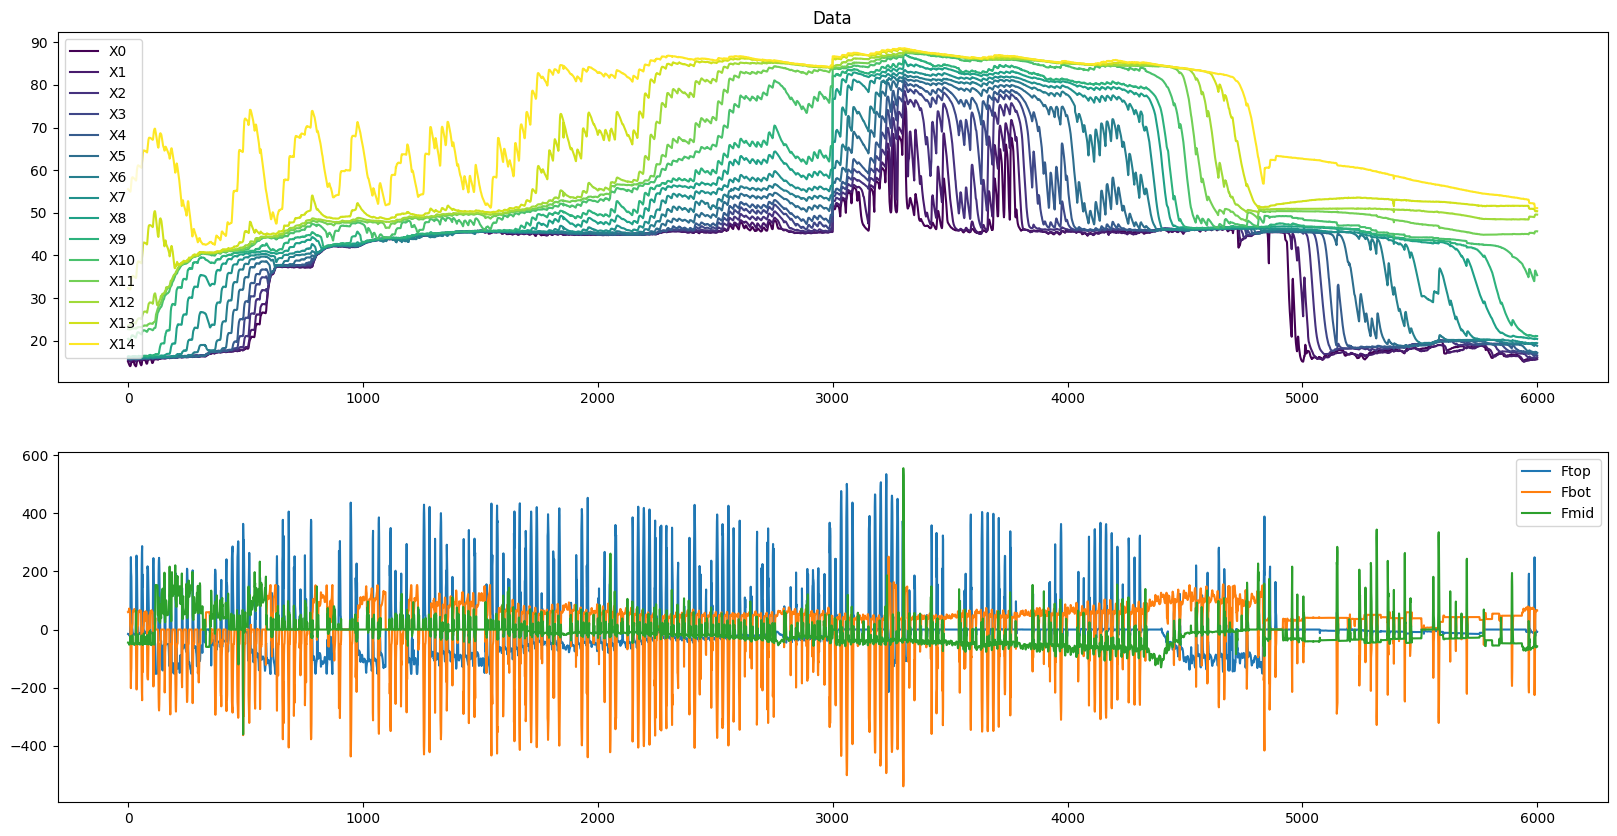

In [2]:

fig, ax = plt.subplots(2, 1, figsize=(20, 10))
data.iloc[:6000, 2:17].plot(ax = ax[0], colormap='viridis')
ax[0].set_title('Data')
ax[0].legend()
data.iloc[:6000, 19:22].plot(ax = ax[1])

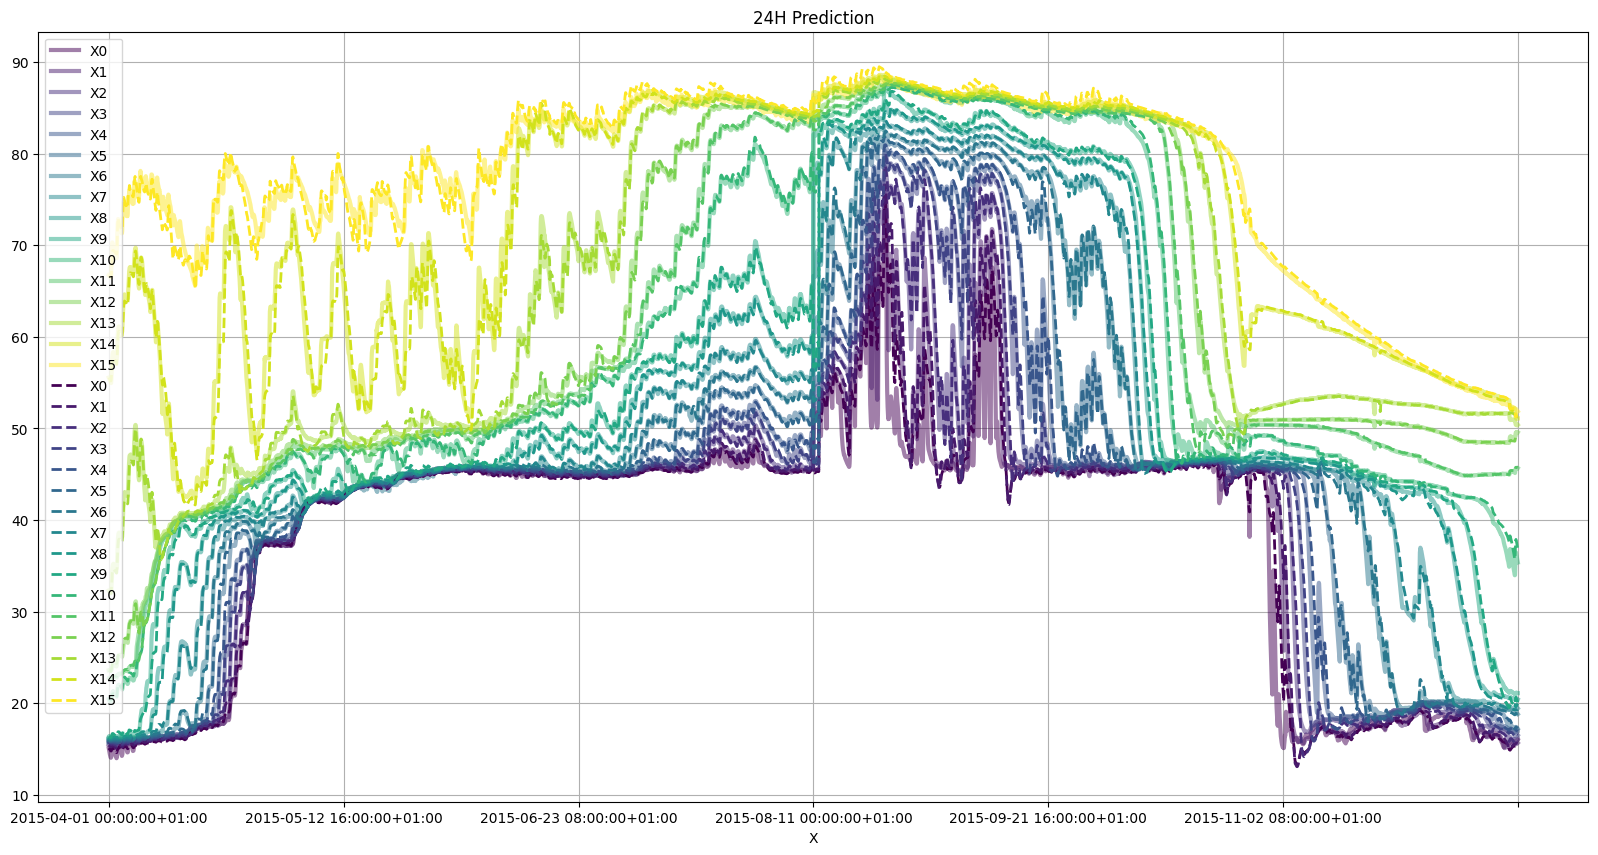

In [3]:
pred.index = data.X
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
data.iloc[:6000, 2:18].plot(ax = ax, colormap='viridis', alpha = 0.5, linewidth=3)
pred.iloc[:6000, 1:].plot(ax = ax, linestyle='--', colormap='viridis',linewidth=2)
ax.set_title('24H Prediction')
ax.grid(True)


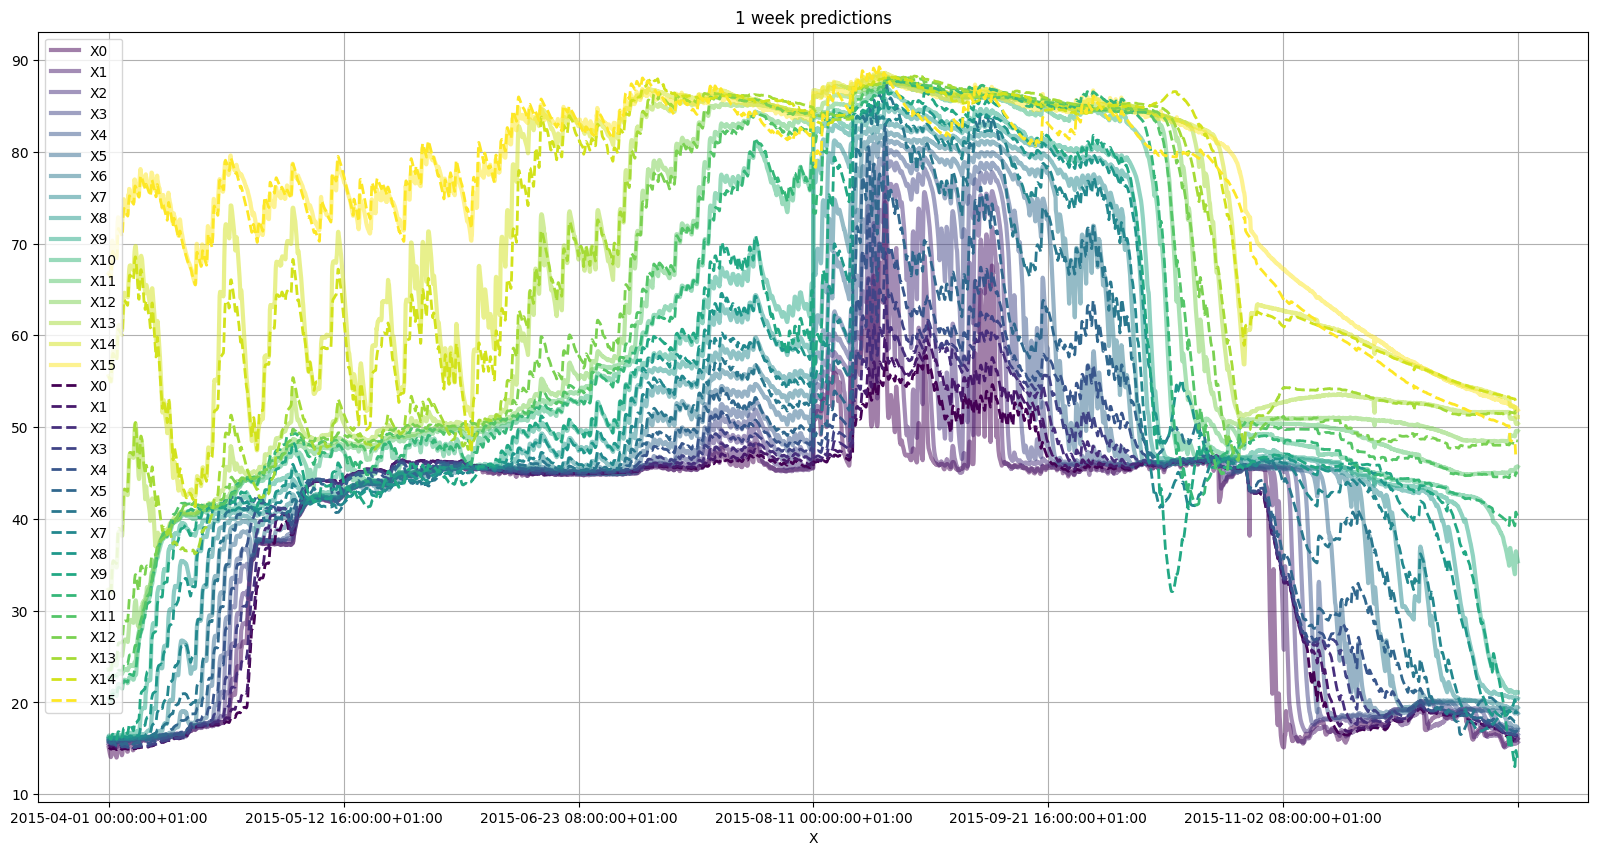

In [8]:
predw.index = data.X
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
data.iloc[:6000, 2:18].plot(ax = ax, colormap='viridis', alpha = 0.5, linewidth=3)
predw.iloc[:6000, 1:].plot(ax = ax, linestyle='--', colormap='viridis',linewidth=2)
ax.set_title('1 week predictions')
ax.grid(True)


<Axes: xlabel='X'>

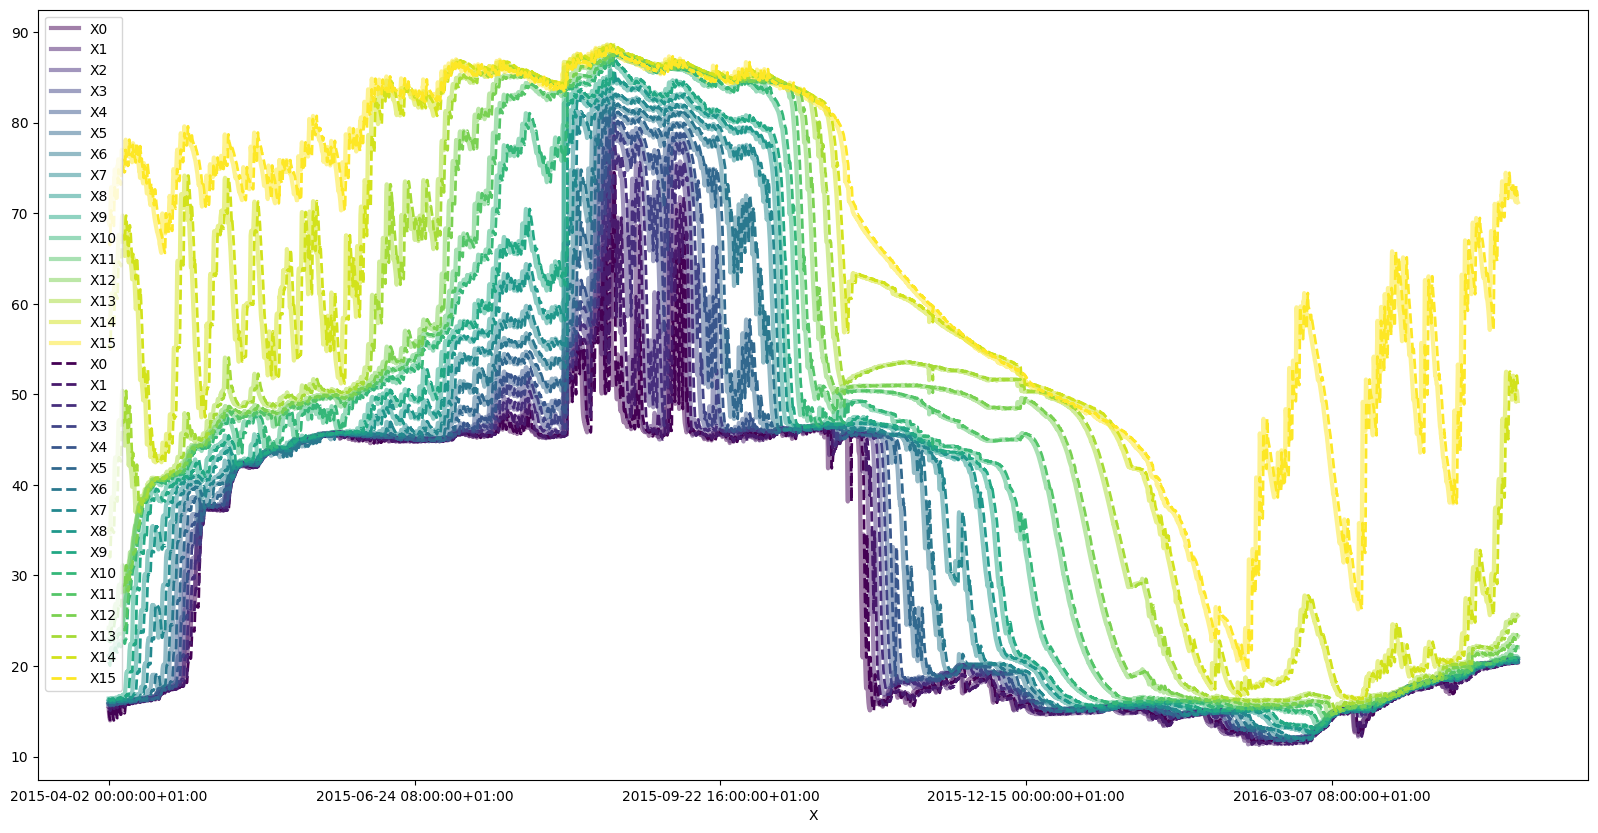

In [37]:
k = 24
p = data.iloc[:-k, 2:18]
d = data.iloc[k:,2:18]
x = data.X[d.index]
p.index = x
d.index = x


fig, ax = plt.subplots(1, 1, figsize=(20, 10))
d.plot(ax = ax, colormap='viridis', alpha = 0.5, linewidth=3)
p.plot(ax = ax, linestyle='--', colormap='viridis',linewidth=2)

In [10]:
data.iloc[:6000,2:18].index = data.X[:6000]
pred.iloc[:6000,1:].index = data.X[:6000]

In [11]:
data.index = data.X 
data

Unnamed: 0                          X         X0  \
X                                                                             
2015-04-01 00:00:00+01:00        8041  2015-04-01 00:00:00+01:00  15.100000   
2015-04-01 01:00:00+01:00        8042  2015-04-01 01:00:00+01:00  14.950000   
2015-04-01 02:00:00+01:00        8043  2015-04-01 02:00:00+01:00  14.766667   
2015-04-01 03:00:00+01:00        8044  2015-04-01 03:00:00+01:00  14.633333   
2015-04-01 04:00:00+01:00        8045  2015-04-01 04:00:00+01:00  14.533333   
...                               ...                        ...        ...   
2016-04-26 19:00:00+01:00       17444  2016-04-26 19:00:00+01:00  20.600000   
2016-04-26 20:00:00+01:00       17445  2016-04-26 20:00:00+01:00  20.633333   
2016-04-26 21:00:00+01:00       17446  2016-04-26 21:00:00+01:00  20.583333   
2016-04-26 22:00:00+01:00       17447  2016-04-26 22:00:00+01:00  20.450000   
2016-04-26 23:00:00+01:00       17448  2016-04-26 23:00:00+01:00  20.400000   

                                  X1         X2         X3         X4  \
X                                                                       
2015-04-01 00:00:00+01:00  15.450000  15.800000  15.850000  15.700000   
2015-04-01 01:00:00+01:00  15.433333  15.800000  15.850000  15.700000   
2015-04-01 02:00:00+01:00  15.408333  15.800000  15.850000  15.700000   
2015-04-01 03:00:00+01:00  15.425000  15.800000  15.850000  15.716667   
2015-04-01 04:00:00+01:00  15.383333  15.800000  15.850000  15.800000   
...                              ...        ...        ...        ...   
2016-04-26 19:00:00+01:00  20.450000  20.841667  20.800000  20.600000   
2016-04-26 20:00:00+01:00  20.450000  20.850000  20.825000  20.600000   
2016-04-26 21:00:00+01:00  20.408333  20.850000  20.825000  20.600000   
2016-04-26 22:00:00+01:00  20.450000  20.850000  20.800000  20.600000   
2016-04-26 23:00:00+01:00  20.433333  20.825000  20.833333  20.600000   

                                  X5         X6         X7  ...  b7x6  b7x7  \
X                                                           ...               
2015-04-01 00:00:00+01:00  15.800000  16.000000  16.041667  ...     0     0   
2015-04-01 01:00:00+01:00  15.800000  16.000000  16.050000  ...     0     0   
2015-04-01 02:00:00+01:00  15.783333  16.016667  16.050000  ...     0     0   
2015-04-01 03:00:00+01:00  15.750000  16.041667  16.050000  ...     0     0   
2015-04-01 04:00:00+01:00  15.750000  16.033333  16.050000  ...     0     0   
...                              ...        ...        ...  ...   ...   ...   
2016-04-26 19:00:00+01:00  20.500000  20.700000  20.500000  ...     0     0   
2016-04-26 20:00:00+01:00  20.500000  20.700000  20.500000  ...     0     0   
2016-04-26 21:00:00+01:00  20.500000  20.700000  20.500000  ...     0     0   
2016-04-26 22:00:00+01:00  20.500000  20.700000  20.500000  ...     0     0   
2016-04-26 23:00:00+01:00  20.500000  20.700000  20.500000  ...     0     0   

                           b7x8  b7x9  b7x10  b7x11  b7x12    b7x13    b7x14  \
X                                                                              
2015-04-01 00:00:00+01:00     0     0      0      0  0.008  0.10163  0.39437   
2015-04-01 01:00:00+01:00     0     0      0      0  0.008  0.10163  0.39437   
2015-04-01 02:00:00+01:00     0     0      0      0  0.008  0.10163  0.39437   
2015-04-01 03:00:00+01:00     0     0      0      0  0.008  0.10163  0.39437   
2015-04-01 04:00:00+01:00     0     0      0      0  0.008  0.10163  0.39437   
...                         ...   ...    ...    ...    ...      ...      ...   
2016-04-26 19:00:00+01:00     0     0      0      0  0.008  0.10163  0.39437   
2016-04-26 20:00:00+01:00     0     0      0      0  0.008  0.10163  0.39437   
2016-04-26 21:00:00+01:00     0     0      0      0  0.008  0.10163  0.39437   
2016-04-26 22:00:00+01:00     0     0      0      0  0.008  0.10163  0.39437   
2016-04-26 23:00:00+01:00     0     0      0      0  0.008  0

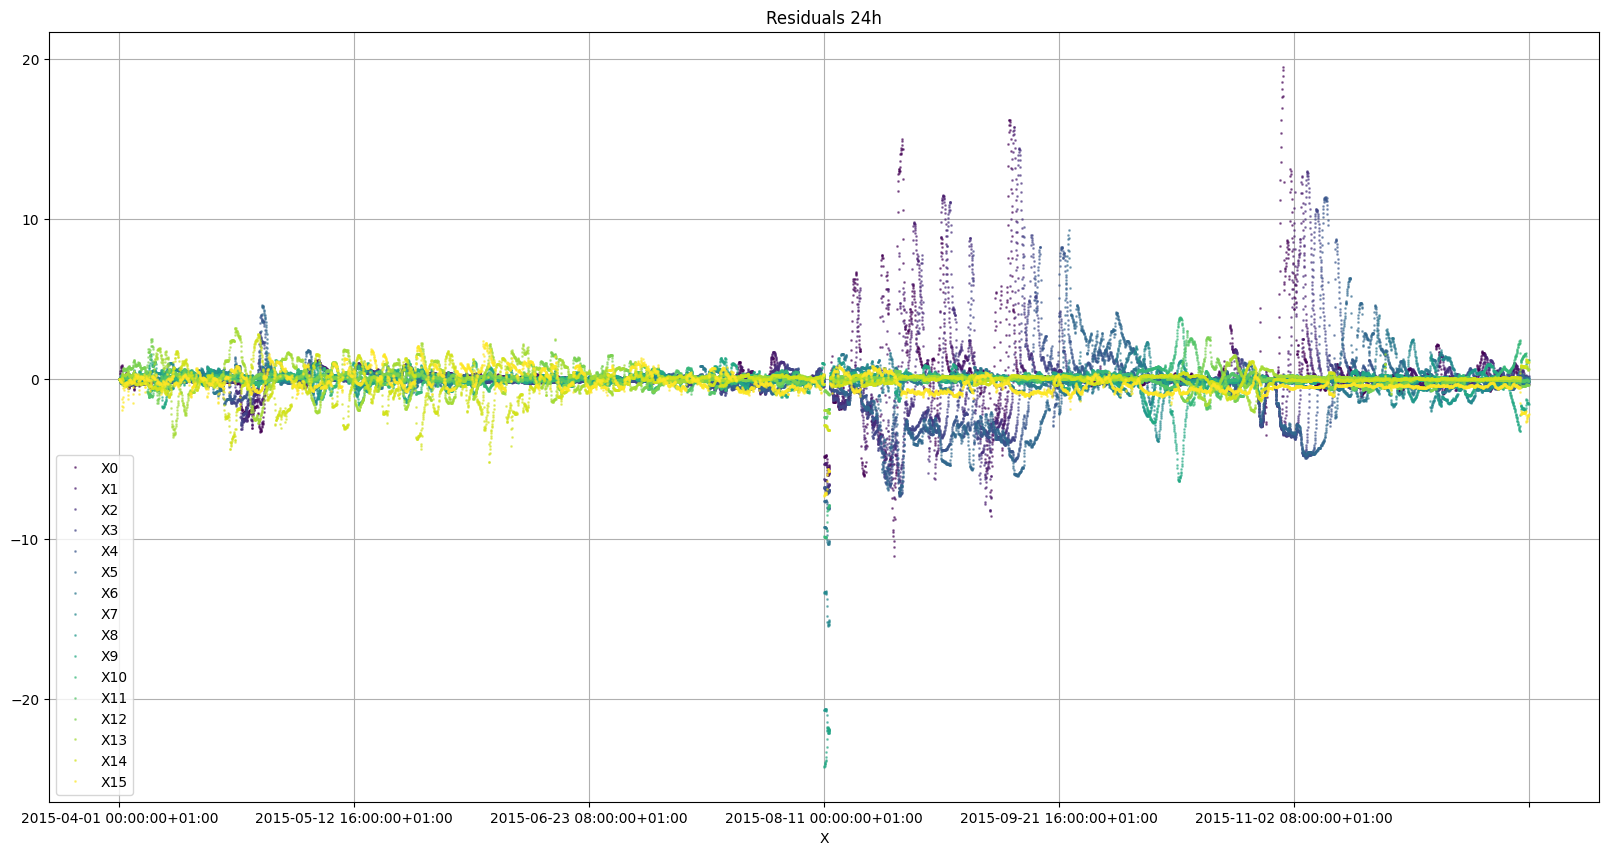

In [12]:
res = pred.iloc[:6000,1:] - data.iloc[:6000,2:18]

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
res.plot(ax = ax, colormap='viridis', alpha = 0.5, marker = 'o', linestyle='None', markersize=1)
ax.set_title('Residuals 24h')
ax.grid(True)


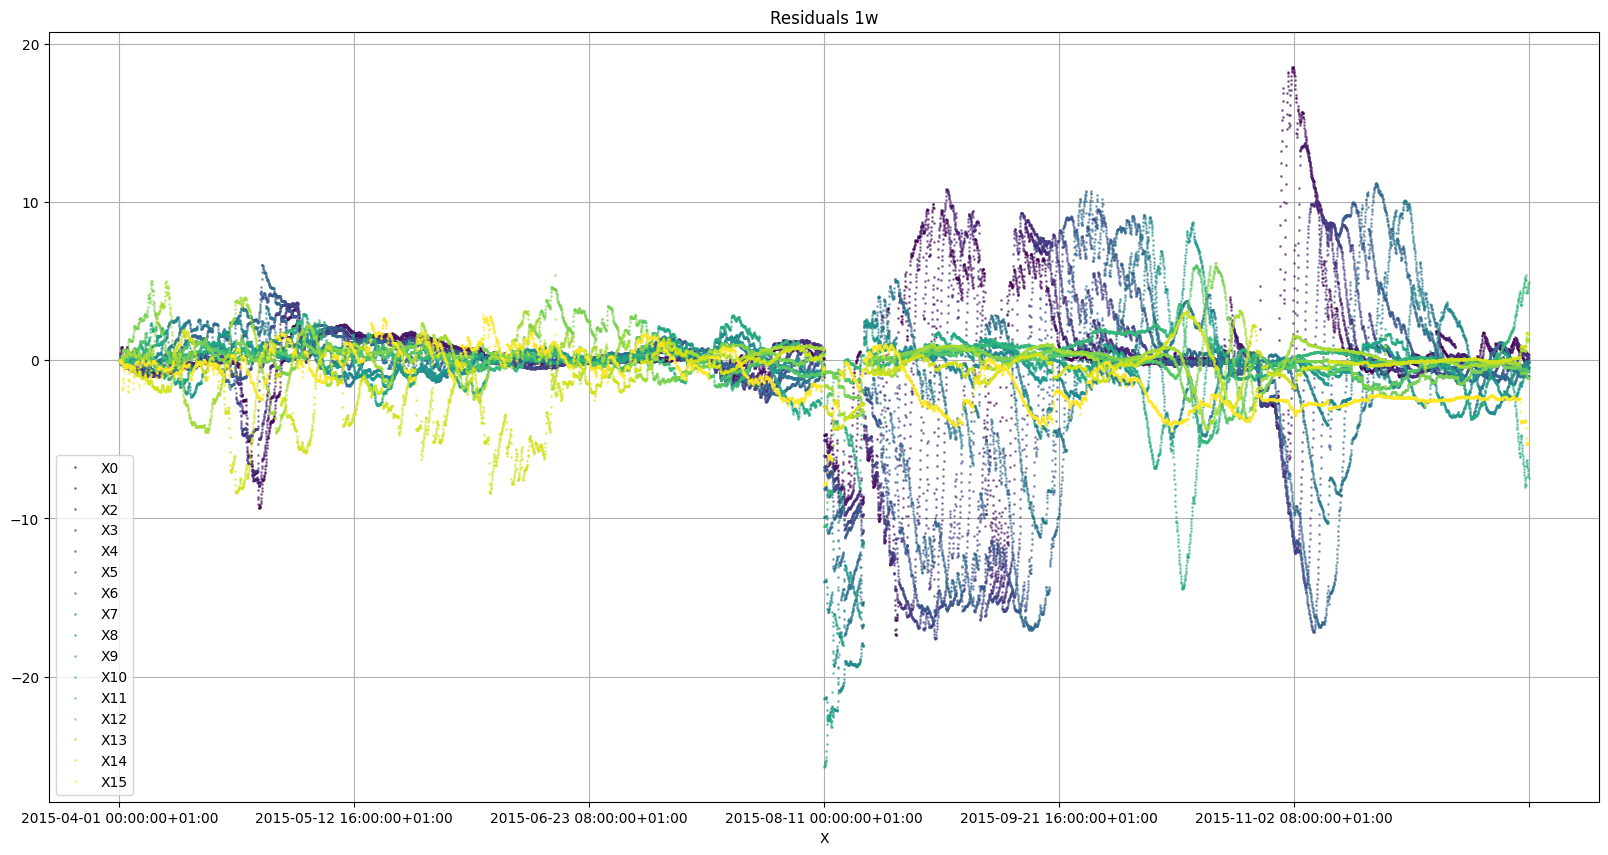

In [13]:
res = predw.iloc[:6000,1:] - data.iloc[:6000,2:18]
res.index = data.iloc[:6000].X

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
res.plot(ax = ax, colormap='viridis', alpha = 0.5, marker = 'o', linestyle='None', markersize=1)
ax.set_title('Residuals 1w')
ax.grid(True)


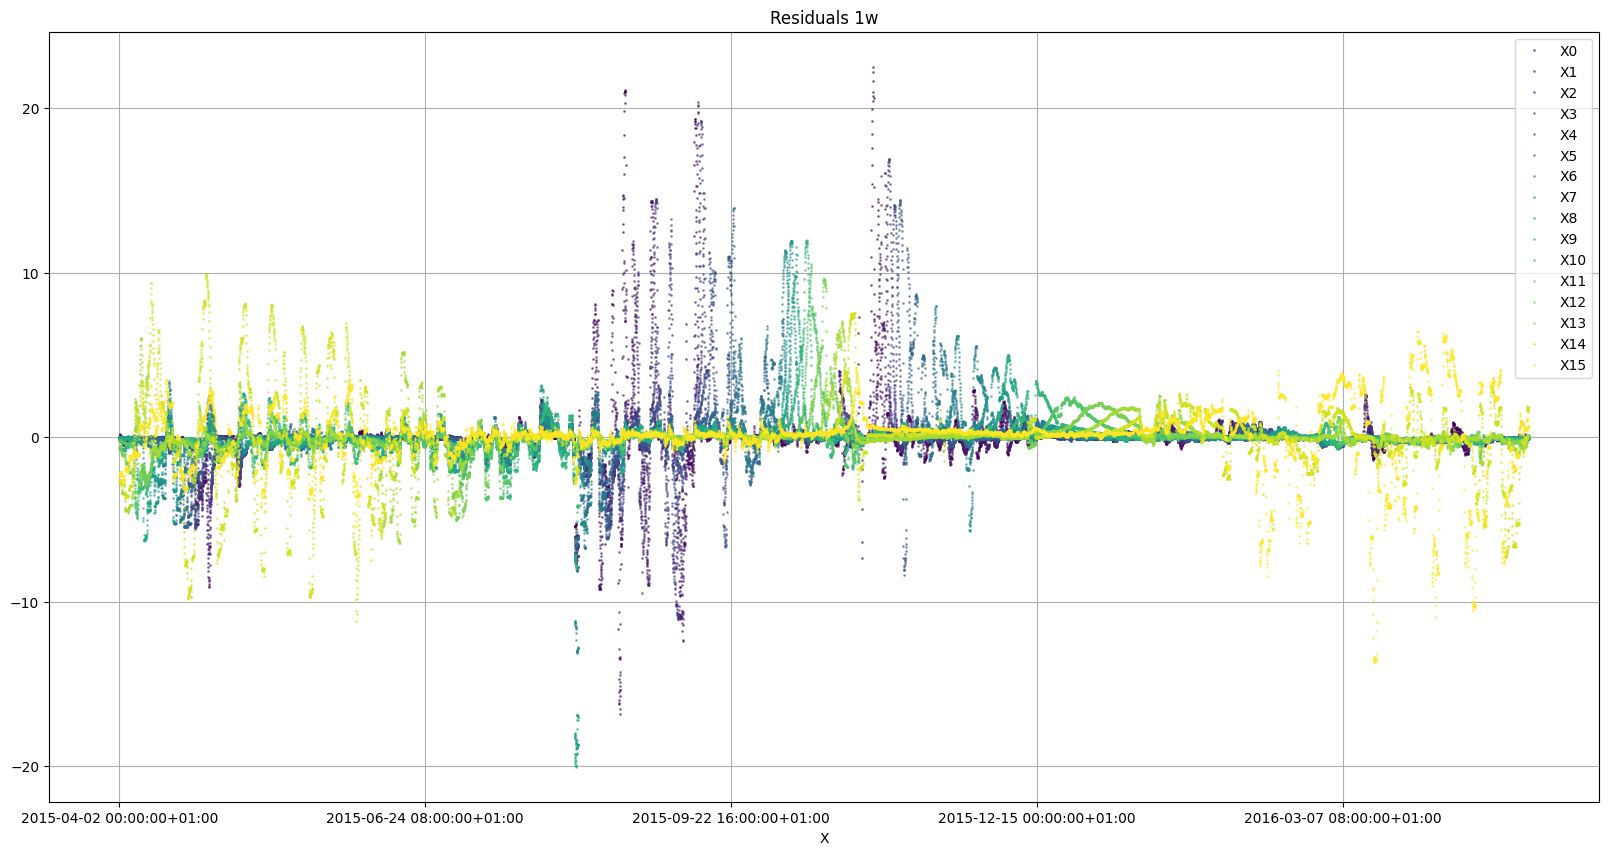

In [38]:
res = p - d
# res.index = data.iloc[:6000].X

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
res.plot(ax = ax, colormap='viridis', alpha = 0.5, marker = 'o', linestyle='None', markersize=1)
ax.set_title('Residuals 1w')
ax.grid(True)


In [14]:
path = '../data/processed/data.csv'
data = pd.read_csv(path)
data.set_index('EVENT_TIME', inplace=True)
data_grouped = data.iloc[:,:56].T.groupby(lambda x: x[-3:]).mean().T
data_grouped['Uin'] = data.U_IN
data_grouped['Uout'] = data.U_OUT
data_grouped['t'] = data.t
data_grouped.to_csv('../data/processed/ht/data_grouped.csv')

In [15]:
data_grouped

T01        T02        T03        T04        T05  \
EVENT_TIME                                                                   
2023-09-01 00:00:00  79.147717  86.007935  86.344421  86.234547  86.271173   
2023-09-01 01:00:00  77.421789  86.030825  86.376467  86.229971  86.241415   
2023-09-01 02:00:00  77.485882  85.902641  86.305510  86.207079  86.262014   
2023-09-01 03:00:00  74.759651  85.927818  86.314665  86.223103  86.211658   
2023-09-01 04:00:00  75.208302  85.813366  86.312374  86.213947  86.220816   
...                        ...        ...        ...        ...        ...   
2023-09-26 07:00:00  81.139174  87.276056  87.637720  87.546162  87.564474   
2023-09-26 08:00:00  80.859911  87.225698  87.587362  87.482069  87.537004   
2023-09-26 09:00:00  79.516253  87.179916  87.575916  87.484358  87.504959   
2023-09-26 10:00:00  77.737679  87.095224  87.564476  87.452311  87.468336   
2023-09-26 11:00:00  77.298183  87.086067  87.516403  87.420265  87.468334   

                           T06        T07        T08        T09        T10  \
EVENT_TIME                                                                   
2023-09-01 00:00:00  85.673737  84.451397  83.077978  81.677094  77.273003   
2023-09-01 01:00:00  85.708073  84.419350  83.071110  81.610710  77.142530   
2023-09-01 02:00:00  85.694338  84.437664  83.043644  81.551197  76.959410   
2023-09-01 03:00:00  85.682894  84.407904  83.020752  81.516865  76.806042   
2023-09-01 04:00:00  85.694338  84.405617  82.970396  81.423012  76.609186   
...                        ...        ...        ...        ...        ...   
2023-09-26 07:00:00  87.026552  83.723482  81.569510  79.994658  73.207691   
2023-09-26 08:00:00  87.033419  83.652527  81.551197  79.914541  73.047459   
2023-09-26 09:00:00  86.976194  83.657104  81.519152  79.891651  73.008545   
2023-09-26 10:00:00  86.960167  83.650236  81.509996  79.832136  72.962763   
2023-09-26 11:00:00  86.969326  83.609032  81.500839  79.806957  72.999390   

                           T11        T12        T13        T14  Uin  \
EVENT_TIME                                                             
2023-09-01 00:00:00  65.679078  55.330382  52.670533  51.999846  0.0   
2023-09-01 01:00:00  65.365480  55.163284  52.574392  52.004424  0.0   
2023-09-01 02:00:00  65.045016  54.991607  52.540058  51.983824  0.0   
2023-09-01 03:00:00  64.616967  54.808484  52.508011  51.999847  0.0   
2023-09-01 04:00:00  64.188922  54.597894  52.441629  51.970089  0.0   
...                        ...        ...        ...        ...  ...   
2023-09-26 07:00:00  56.999084  51.548908  50.942316  50.880512  0.0   
2023-09-26 08:00:00  56.877765  51.537463  50.944605  50.839310  0.0   
2023-09-26 09:00:00  56.802227  51.594688  50.912560  50.839310  0.0   
2023-09-26 10:00:00  56.761025  51.587822  50.903403  50.786662  0.0   
2023-09-26 11:00:00  56.857164  51.539752  50.889668  50.795819  0.0   

                           Uout      t  
EVENT_TIME                              
2023-09-01 00:00:00   98.300003    0.0  
2023-09-01 01:00:00  149.500000    1.0  
2023-09-01 02:00:00  156.199997    2.0  
2023-09-01 03:00:00  194.600006    3.0  
2023-09-01 04:00:00  163.000000    4.0  
...                         ...    ...  
2023-09-26 07:00:00  173.100006  607.0  
2023-09-26 08:00:00    0.000000  608.0  
2023-09-26 09:00:00    0.000000  609.0  
2023-09-26 10:00:00    0.000000  610.0  
2023-09-26 11:00:00    0.000000  611.0  

[609 rows x 17 columns]